# 1. import important libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import joblib



# 2. Data Handling


In [2]:
diamonds = pd.read_csv('diamonds.csv')

## 2.1. Getting sense of the data

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.shape

(53940, 11)

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There's an unecessary column seems to be just index , which needs to be dropped 

In [7]:
diamonds.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
diamonds.shape

(53940, 10)

In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2.2 Checking null values

The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth
Dropping these beacuse it's a Missing value


In [10]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 10)

to check if there are any nan value

In [11]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [75]:
 diamonds.describe(include=['object'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [76]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [77]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [78]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# 3. Data Visulization

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(diamonds.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

check distribution

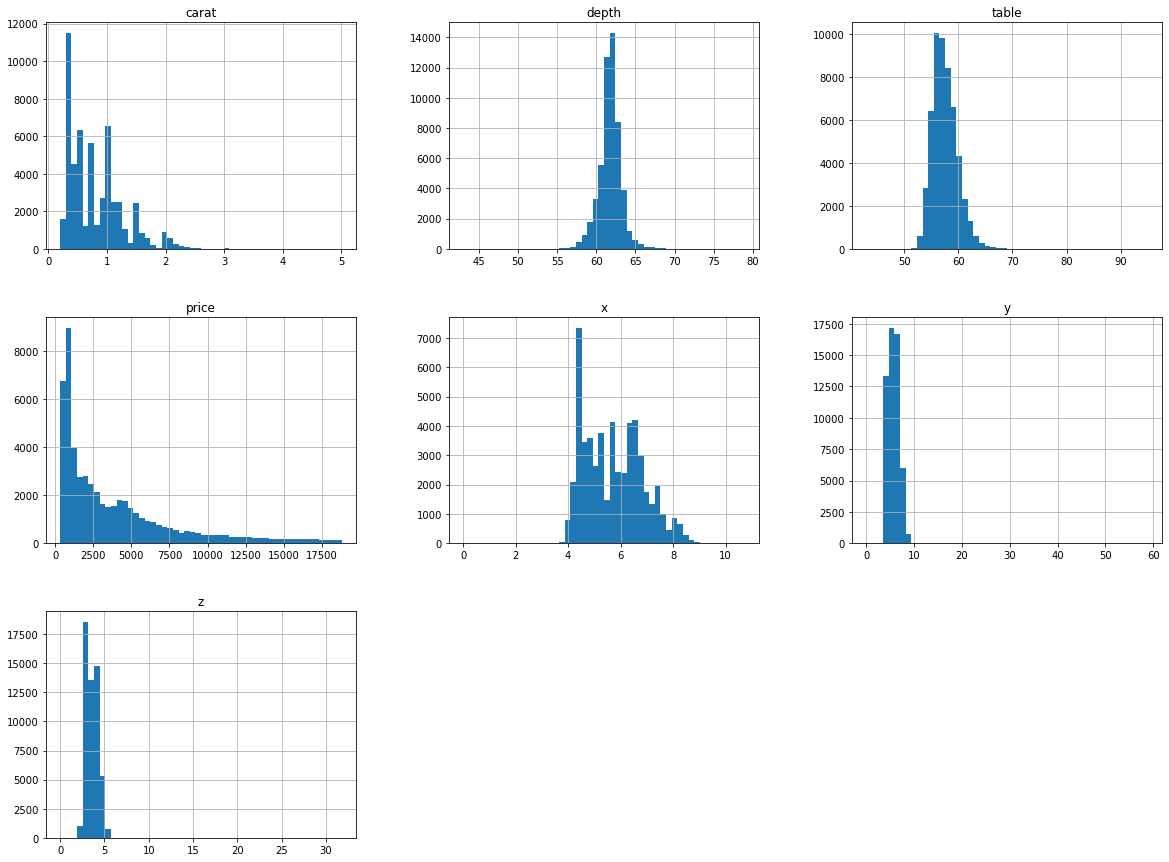

In [79]:
diamonds.hist(bins = 50, figsize = (20, 15))
plt.show()

cheack outlier

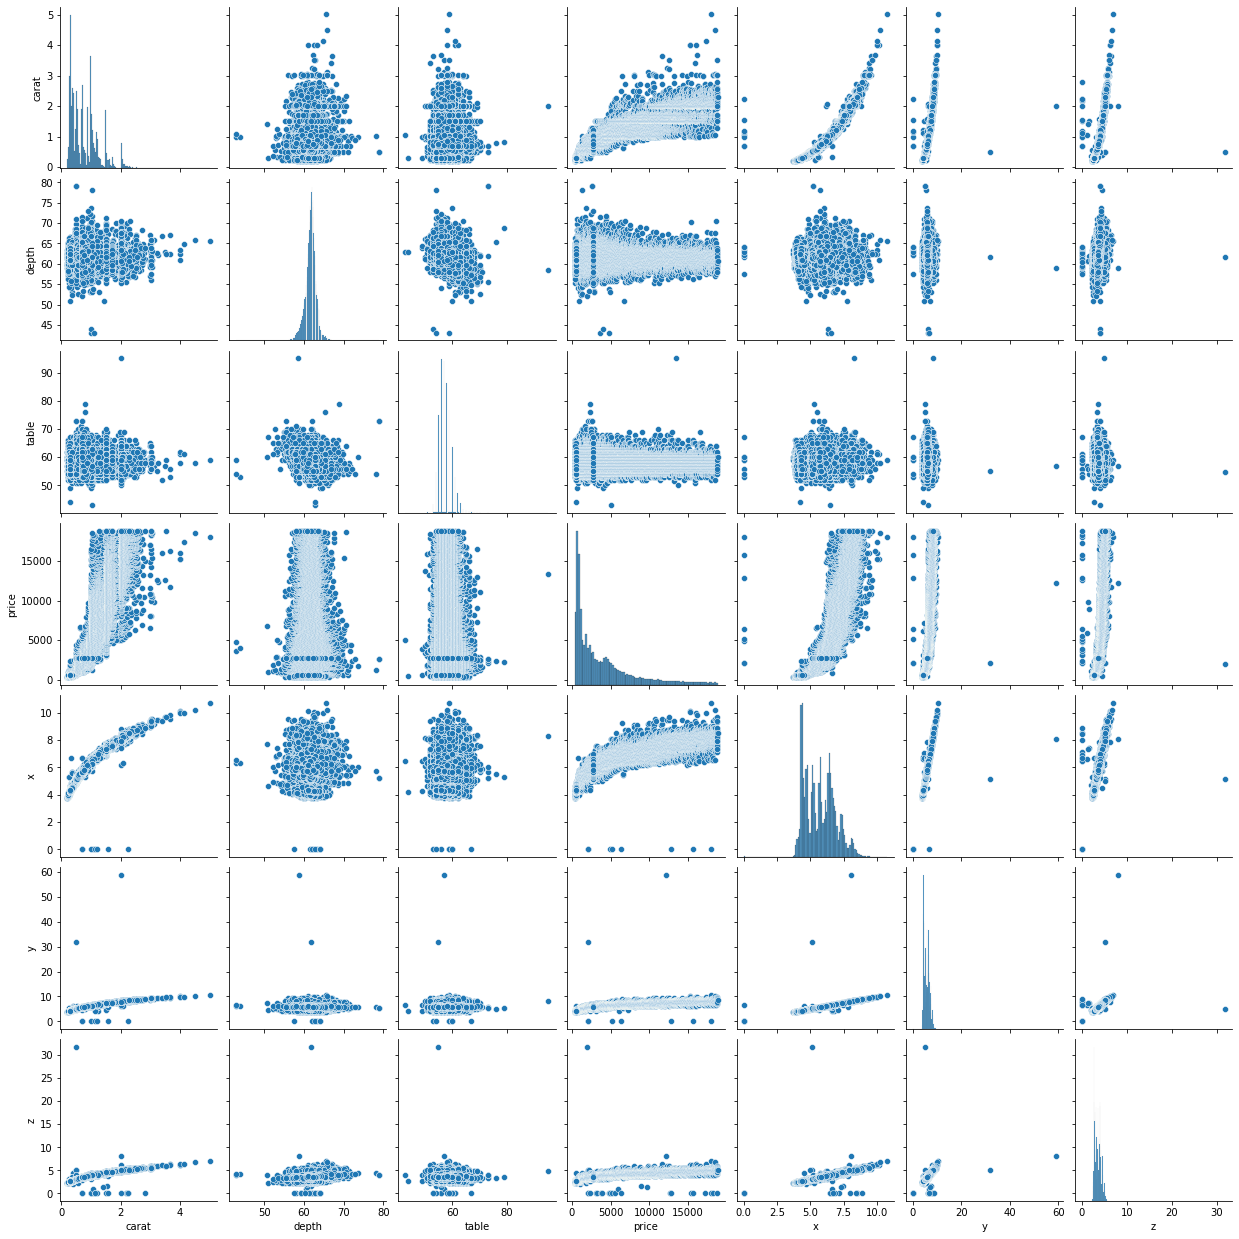

In [80]:
sns.pairplot(diamonds)

check correlation

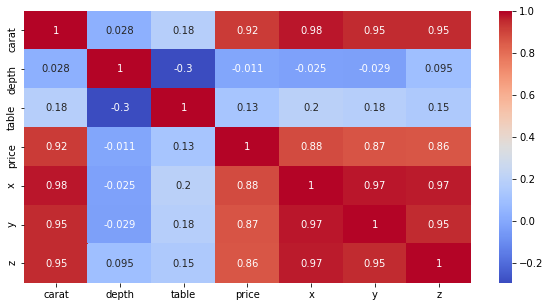

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(diamonds.corr(), cmap = "coolwarm", annot = True)
plt.show()

In [18]:
correlations = diamonds.corr()['price'].sort_values()
correlations

depth   -0.010729
table    0.127245
y        0.867864
z        0.868206
x        0.887231
carat    0.921592
price    1.000000
Name: price, dtype: float64

In [19]:
correlations=diamonds.corr()["price"].sort_values(ascending=False)
correlations

price    1.000000
carat    0.921592
x        0.887231
z        0.868206
y        0.867864
table    0.127245
depth   -0.010729
Name: price, dtype: float64

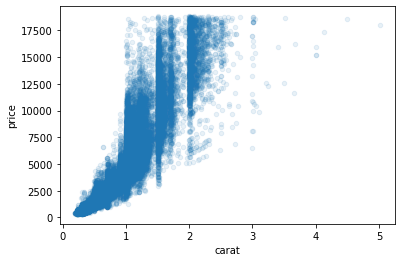

In [86]:
diamonds.plot(kind='scatter', x='carat', y='price', alpha=0.1)
plt.show()

 ## 3.1. Categorical Data Essense

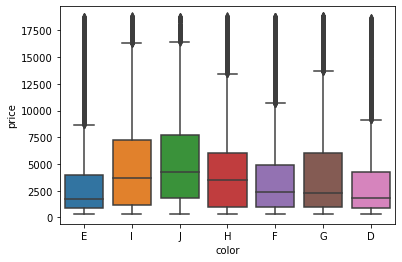

In [87]:
sns.boxplot(data = diamonds, x= 'color', y = 'price')
plt.show()

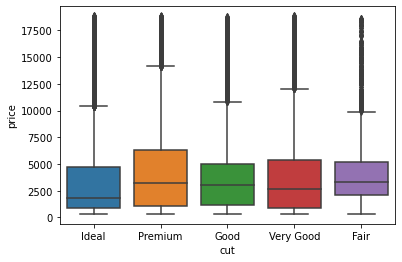

In [88]:
sns.boxplot(data = diamonds, x= 'cut', y = 'price')
plt.show()

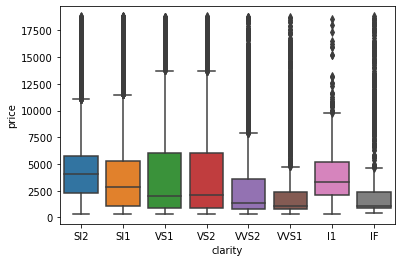

In [89]:
sns.boxplot(data = diamonds, x= 'clarity', y = 'price')
plt.show()

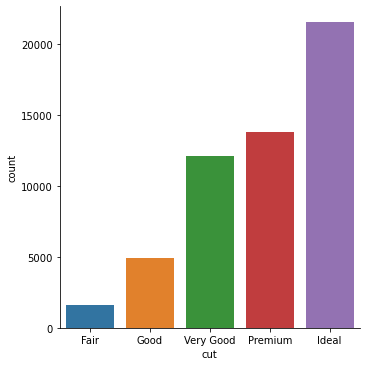

In [96]:
sns.catplot(x = 'cut', data = diamonds, order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], kind = 'count')
plt.show()

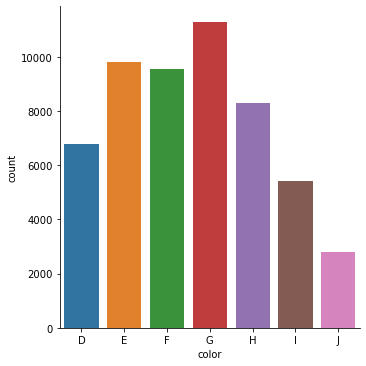

In [98]:
sns.catplot(x = 'color', data = diamonds, order = ['D', 'E', 'F', 'G', 'H', 'I', 'J'], kind = 'count')
plt.show()

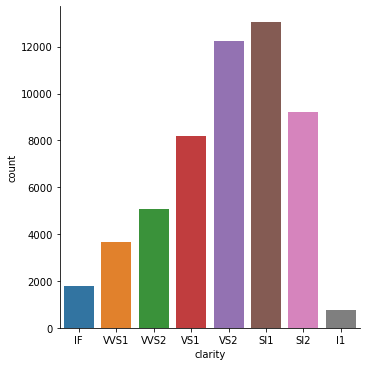

In [101]:
sns.catplot(x = 'clarity', data = diamonds, order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], kind = 'count')
plt.show()

<AxesSubplot:xlabel='carat', ylabel='depth'>

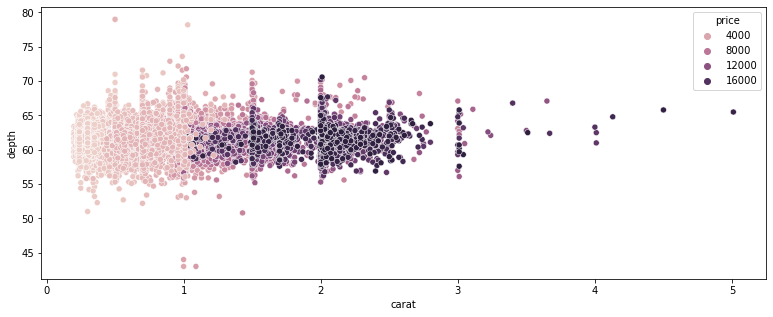

In [17]:
plt.figure(figsize=(13,5))
sns.scatterplot(x=diamonds['carat'], y=diamonds['depth'], hue=diamonds['price'])

<AxesSubplot:xlabel='carat', ylabel='table'>

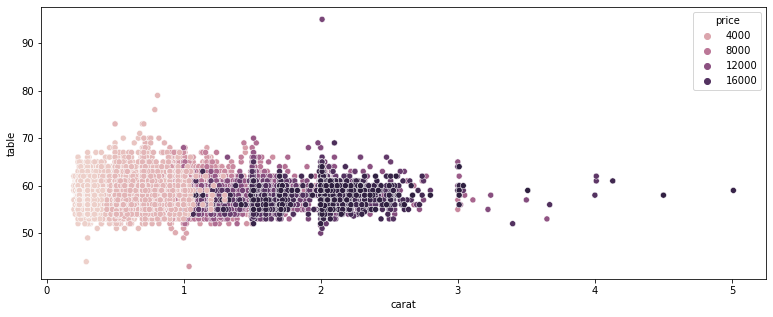

In [19]:
plt.figure(figsize=(13,5))
sns.scatterplot(x=diamonds['carat'], y=diamonds['table'], hue=diamonds['price'])

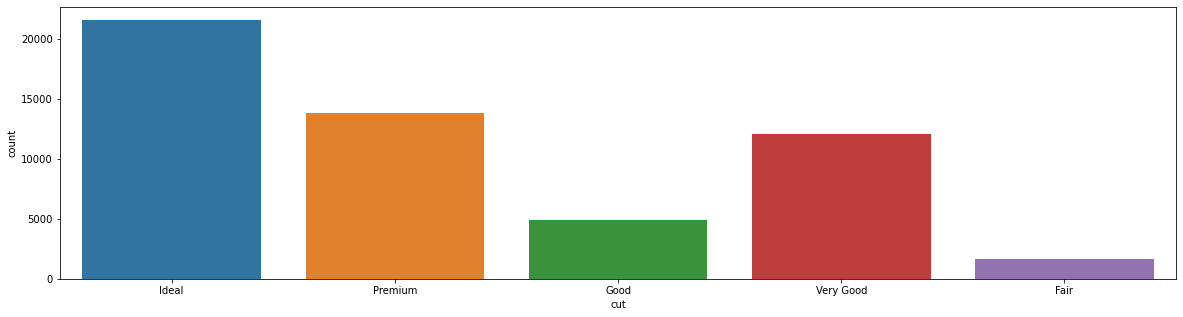

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x = diamonds['cut'])
plt.show()

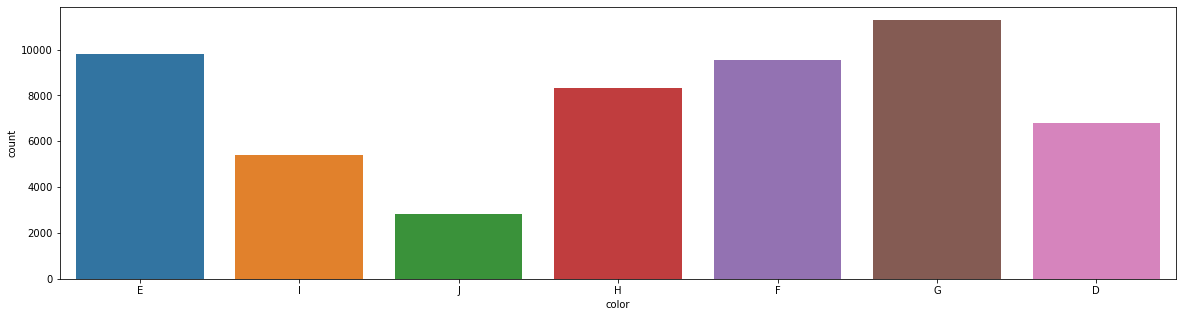

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x = diamonds['color'])
plt.show()

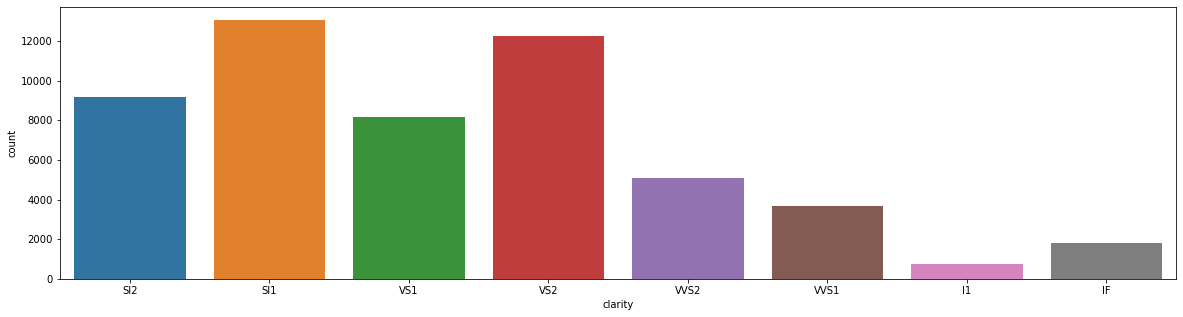

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x = diamonds['clarity'])
plt.show()

In [62]:
print(diamonds['cut'].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


In [63]:
print(diamonds['color'].unique())

['E' 'D' 'H' 'F' 'I' 'J' 'G']


In [64]:
print(diamonds['clarity'].unique())

['VS1' 'SI2' 'VS2' 'VVS1' 'IF' 'VVS2' 'SI1' 'I1']


# 4. split Data to train and test

In [3]:
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

# 5. split to data and label

In [4]:
diamonds = train_set.drop("price", axis=1)
diamonds_labels = train_set["price"].copy()

# 6. Pipelie With Categorical Data and Standerd Numrical Data

In [ ]:
diamonds_num = diamonds.drop(["clarity","color","cut"], axis=1)
diamonds_num = list(diamonds_num)
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())])

categorical_features = ["clarity","color","cut"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, diamonds_num),
        ('cat', categorical_transformer, categorical_features)])

diamonds_prepared = preprocessor.fit_transform(diamonds)

### other solution with OneHotEncoding

In [25]:
onehotencoder = OneHotEncoder()
diamonds_cat_1hot=onehotencoder.fit_transform(diamonds[["cut","color","clarity"]])
diamonds_cat_1hot.toarray().shape
onehotencoder.categories_
diamonds_cat_1hot.toarray()
encoded_data = pd.DataFrame(diamonds_cat_1hot.toarray(), index=diamonds.index)
diamonds_num = diamonds.drop(["clarity","color","cut"], axis=1)
concatenated_data = pd.concat([diamonds_num, encoded_data], axis=1)
concatenated_data.head()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### other solution with get_dummies pandas function

In [38]:
one_hot_encoders_diamond_data =  pd.get_dummies(diamonds)
one_hot_encoders_diamond_data.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50176,0.55,61.5,56.0,5.26,5.29,3.24,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17688,1.30,60.2,59.0,7.05,7.00,4.23,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
38203,0.43,61.9,55.0,4.95,4.80,3.02,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1826,0.72,62.1,59.0,5.69,5.74,3.55,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34543,0.43,62.2,58.0,4.81,4.87,3.01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### other solution to make StandardScaler to numerical data

In [40]:
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamonds[['carat','depth','x','y','z','table']]),
                           columns=['carat','depth','x','y','z','table'], index=diamonds.index)

In [41]:
diamond_clean_data_standard = one_hot_encoders_diamond_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [42]:
diamond_clean_data_standard.shape

(43136, 26)

In [43]:
diamond_clean_data_standard

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50176,-0.521562,-0.172856,-0.654962,-0.420239,-0.388888,-0.431420,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17688,1.060175,-1.082975,0.692117,1.178089,1.110219,0.998388,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
38203,-0.774640,0.107180,-1.103988,-0.697044,-0.818456,-0.749155,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1826,-0.163035,0.247199,0.692117,-0.036283,0.005614,0.016298,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34543,-0.774640,0.317208,0.243091,-0.822053,-0.757089,-0.763597,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11290,1.039085,1.157318,-0.205935,1.062009,0.908585,1.171698,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44749,-0.584832,0.877281,0.243091,-0.545248,-0.555455,-0.460305,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
38175,-0.837910,0.177190,-0.654962,-0.893487,-0.853523,-0.864695,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
860,0.216582,0.737263,0.692117,0.356602,0.259848,0.406245,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


****************************** But we will chosse Pipeline ******************************

# 7. Model Selection and Training

## 7.1 Linear Regression

In [48]:
lin_reg=LinearRegression()
lin_reg.fit(diamonds_prepared,diamonds_labels)
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1136.0632608890369

### with cross validation

In [ ]:
scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [ ]:
display_scores(linear_rmse_scores)

## 7.2 DecisionTreeRegressor

In [ ]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared,diamonds_labels)
diamonds_predictions_tree = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

### with cross validation

In [ ]:
scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(tree_rmse_scores)

## 7.3 RandomForestRegressor

In [ ]:
forest_reg=RandomForestRegressor()
forest_reg.fit(diamonds_prepared,diamonds_labels)
diamonds_predictions_forest = forest_reg.predict(diamonds_prepared)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### with cross validation

In [ ]:
scores = cross_val_score(forest_reg, diamonds_prepared, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(forest_rmse_scores)

#  8. Grid Search

In [ ]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
metrics.r2_score(diamonds_labels, diamonds_predictions)


# 9. Evalute with Test Data

In [54]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()
X_test_prepared = preprocessor.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
final_rmse

533.6941364217266

# 10. Save Final Model

In [ ]:
joblib.dump(final_model,"final_model.pkl")

### other solution with select model

In [ ]:
estimators = {
'LinearRegression': LinearRegression(),
'DecisionTreeRegressor': DecisionTreeRegressor(),
'RandomForestRegressor': RandomForestRegressor()
 }

In [ ]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=diamonds_prepared, y=diamonds_labels, cv=kfold,
    scoring='r2')
    print(f'{estimator_name}: ' + f'mean of r2 scores={scores.mean():.3f}')